# DistilBERT Fine-Tuning on IMDB Dataset
This notebook demonstrates fine-tuning **DistilBERT** on the IMDB sentiment dataset with EDA, training, and evaluation.

In [ ]:
# Install dependencies (if needed)
import sys
print(sys.executable)



c:\Users\sejal\OneDrive\Desktop\shadowFox\.venv\Scripts\python.exe


In [5]:
!c:\Users\sejal\OneDrive\Desktop\shadowFox\.venv\Scripts\python.exe -m pip install datasets transformers torch scikit-learn matplotlib seaborn


  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached transformers-4.56.0-py3-none-any.whl.metadata (40 kB)
  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached pyarrow-21.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached aiohttp-3.12.15-cp313-cp313-win_amd64.whl.metadata (7.9 kB)
  Using cached tokenizers-0.22.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import torch

c:\Users\sejal\OneDrive\Desktop\shadowFox\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset   # ✅ Add this
from transformers import (
    DistilBertTokenizerFast, 
    DistilBertForSequenceClassification, 
    Trainer, 
    TrainingArguments, 
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import torch


c:\Users\sejal\OneDrive\Desktop\shadowFox\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
dataset = load_dataset("imdb")
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])


c:\Users\sejal\OneDrive\Desktop\shadowFox\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sejal\.cache\huggingface\hub\datasets--imdb. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downl

## EDA

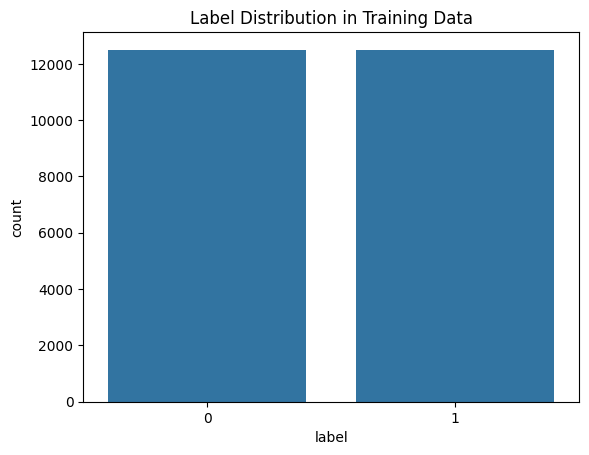

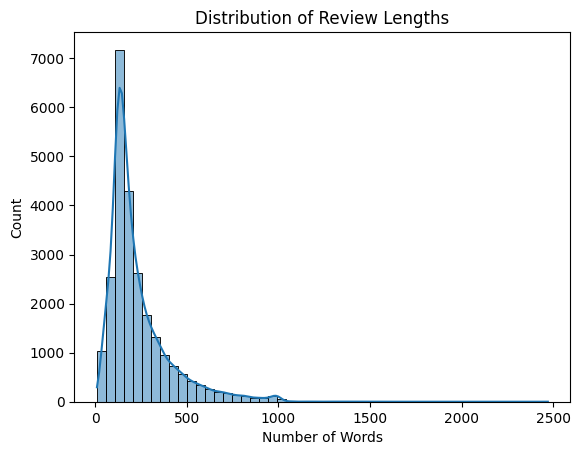

Positive review:
 Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I'd have to say that The Third Man has a more well-crafted storyline. Zentropa is a bit disjointed in this respect. Perhaps this is intentional: it is 

Negative review:
 I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In pa

In [12]:
sns.countplot(x=train_df['label'])
plt.title("Label Distribution in Training Data")
plt.show()

train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.show()

print("Positive review:\n", train_df[train_df['label']==1]['text'].iloc[0][:500])
print("\nNegative review:\n", train_df[train_df['label']==0]['text'].iloc[0][:500])

## Tokenization

In [2]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=False)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")

train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(5000))
test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(2000))

NameError: name 'dataset' is not defined

## Model

In [15]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Error while downloading from https://huggingface.co/distilbert-base-uncased/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
Error while downloading from https://huggingface.co/distilbert-base-uncased/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for prediction

In [5]:
import transformers
print(transformers.__version__)
import transformers, sys
print("Transformers version:", transformers.__version__)
print("Python executable:", sys.executable)


4.56.0
Transformers version: 4.56.0
Python executable: c:\Users\sejal\OneDrive\Desktop\shadowFox\.venv\Scripts\python.exe


## Training & Evaluation

In [7]:
from transformers import TrainingArguments

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # now works
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
)



trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

train_result = trainer.train()

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

## Training Curves

In [4]:
logs = pd.DataFrame(trainer.state.log_history)
train_loss = logs[logs['loss'].notna()][['step','loss']]
eval_loss = logs[logs['eval_loss'].notna()][['step','eval_loss']]

plt.plot(train_loss['step'], train_loss['loss'], label="Training Loss")
plt.plot(eval_loss['step'], eval_loss['eval_loss'], label="Validation Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

NameError: name 'trainer' is not defined

## Final Evaluation

In [ ]:
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))